jt -t onedork -f fira -fs 13 -nf ptsans -nfs 11 -N -kl -cursw 5 -cursc r -cellw 95% -T

# Repository
https://github.com/shiva-kumarj/CPM-prediction-with-MiQ

## CPM Prediction for Real Time Bidding

### Read the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397023 entries, 0 to 1397022
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Line Item ID         1397023 non-null  int64  
 1   Date                 1397023 non-null  object 
 2   App/URL ID           1397023 non-null  object 
 3   ISP or Carrier ID    1397023 non-null  int64  
 4   Device Type          1397023 non-null  object 
 5   Exchange ID          1397023 non-null  int64  
 6   Operating System     1397023 non-null  object 
 7   Browser              1397023 non-null  object 
 8   Creative Size        1397023 non-null  object 
 9   Advertiser Currency  1397023 non-null  object 
 10  Impressions          1397023 non-null  int64  
 11  IO_ID                1397023 non-null  int64  
 12  CPM                  1397023 non-null  float64
dtypes: float64(1), int64(5), object(7)
memory usage: 138.6+ MB


## primary data analysis

What is ?
- Line Item ID
    - Line item ID is the types of strategy used per IO_ID. 
    - Each Line Item ID can focus on any stragety such as Device Type, OS, App URL etc.
- IO_ID
    - Consider IO_ID as an ID specific to an ad campaign by an advertising company.
    - One company can have multiple IO_IDs, one for each ad campaign

#### Change dtype of date

In [5]:
# Convert date to correct dtype
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')

In [6]:
# Whats the date range
date_info = dict(df['Date'].describe())
print("Start Date: ", date_info['first'])
print("End Date: ", date_info['last'])

Start Date:  2020-08-17 00:00:00
End Date:  2020-08-27 00:00:00


In [7]:
# number of unique App/URL ID
# There are too many classes this. We can reduce such that, we take classes which capture 95% of data.

df['App/URL ID'].value_counts(normalize = True) * 100

45435178628    1.084807
2523807089     1.025252
4.47405E+11    0.788391
5.75679E+11    0.745872
4871543971     0.696767
                 ...   
4.29925E+11    0.000072
8.42075E+11    0.000072
6.03459E+11    0.000072
32511305786    0.000072
4.85636E+11    0.000072
Name: App/URL ID, Length: 29290, dtype: float64

In [8]:
# unique ISPs
# reduce the number of classes to the onces which capture 95% of the data
df['ISP or Carrier ID'].value_counts(normalize = True) * 100

1000     21.556195
673       5.211009
207       5.042007
828       4.060706
1         3.576534
           ...    
452       0.000072
71142     0.000072
474       0.000072
71021     0.000072
290       0.000072
Name: ISP or Carrier ID, Length: 277, dtype: float64

In [9]:
# unique Device types
df['Device Type'].value_counts(normalize = True)

Smart Phone     0.478140
Tablet          0.300974
Desktop         0.208353
Connected TV    0.012532
Name: Device Type, dtype: float64

In [10]:
# operating systems in the dataset
# 
df['Operating System'].value_counts(normalize = True)

iOS 13.6                1.806606e-01
Android 10.0            1.559395e-01
Windows 10              1.353743e-01
Android 9.0             1.003734e-01
iOS 13.5                4.263280e-02
                            ...     
iOS 5.0                 6.442270e-06
Windows Other           5.726463e-06
Windows Phone OS 8.0    5.010655e-06
iOS 6.0                 3.579039e-06
Android 3.1             7.158078e-07
Name: Operating System, Length: 67, dtype: float64

In [11]:
# Browsers
df['Browser'].value_counts(normalize = True)

Chrome                  6.460187e-01
Safari                  2.655082e-01
Microsoft Edge          4.817745e-02
Safari 13               9.936128e-03
Firefox                 9.894612e-03
Other                   6.659876e-03
Internet Explorer 11    5.307715e-03
Opera                   3.974165e-03
Safari 12               1.658527e-03
Safari 11               1.591241e-03
Safari 10               7.408611e-04
Android Webkit          2.061527e-04
Internet Explorer 7     1.632042e-04
Safari 9                1.130976e-04
Internet Explorer 10    1.503196e-05
Safari 6                1.145293e-05
Safari 8                1.145293e-05
Safari 5                7.873886e-06
Safari 7                2.863231e-06
Internet Explorer 9     7.158078e-07
Internet Explorer 8     7.158078e-07
Name: Browser, dtype: float64

In [12]:
# country of origin of the advertizers
df['Advertiser Currency'].value_counts(normalize = True)

GBP    0.529482
CAD    0.290519
EUR    0.179999
Name: Advertiser Currency, dtype: float64

In [13]:
# types of creative size
df['Creative Size'].value_counts()

300x250    576693
728x90     352068
300x600    202789
160x600    142351
320x50     101835
120x600     12810
970x250      8477
Name: Creative Size, dtype: int64

In [14]:
# distribution of CPM
df['CPM'].describe()

count    1.397023e+06
mean     2.100198e+00
std      6.150170e+00
min      7.500000e-03
25%      5.380000e-01
50%      8.273333e-01
75%      1.903000e+00
max      1.000970e+02
Name: CPM, dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397023 entries, 0 to 1397022
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Line Item ID         1397023 non-null  int64         
 1   Date                 1397023 non-null  datetime64[ns]
 2   App/URL ID           1397023 non-null  object        
 3   ISP or Carrier ID    1397023 non-null  int64         
 4   Device Type          1397023 non-null  object        
 5   Exchange ID          1397023 non-null  int64         
 6   Operating System     1397023 non-null  object        
 7   Browser              1397023 non-null  object        
 8   Creative Size        1397023 non-null  object        
 9   Advertiser Currency  1397023 non-null  object        
 10  Impressions          1397023 non-null  int64         
 11  IO_ID                1397023 non-null  int64         
 12  CPM                  1397023 non-null  float64       
dt

### Bivariate analysis

#### Which browser has the most impressions overall

In [16]:
browser_impressions = df.groupby('Browser', as_index=False)\
.sum()[['Browser', 'Impressions']]\
.sort_values(by=['Impressions'],
             ascending = False).head()

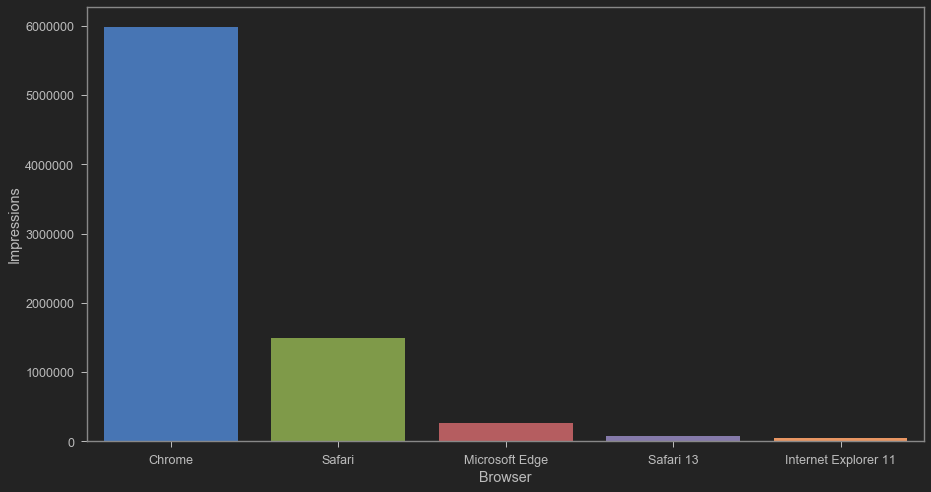

In [32]:
import plotly.express as px
plt.figure(figsize = (15, 8))
fig = sns.barplot(data = browser_impressions, x = 'Browser', y = 'Impressions', )
plt.show()

#### Which Device Type gets the most number of impressions

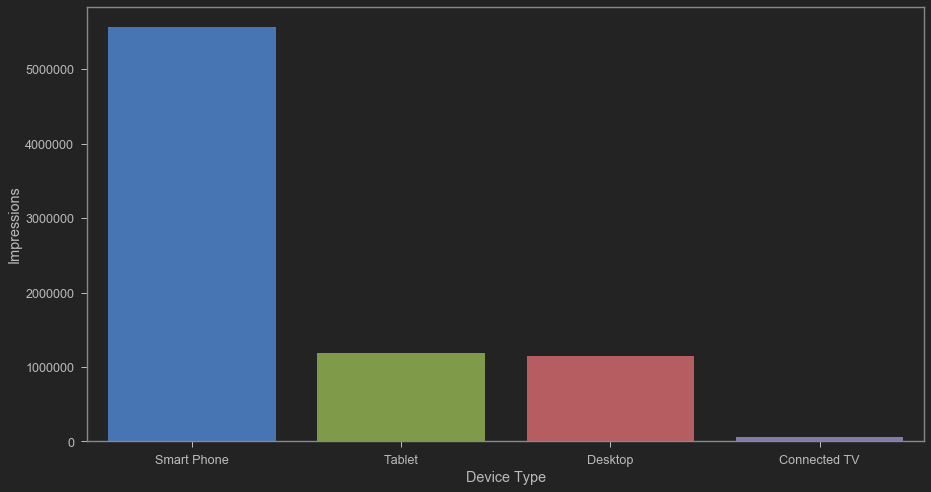

In [29]:
device_impressions = df.groupby('Device Type', as_index=False)\
.sum()[['Device Type','Impressions']]\
.sort_values('Impressions',ascending=False)

plt.figure(figsize = (15, 8))
fig = sns.barplot(data = device_impressions, x = 'Device Type', y = 'Impressions')
plt.show()

#### Which advertiser spent the most for impressions

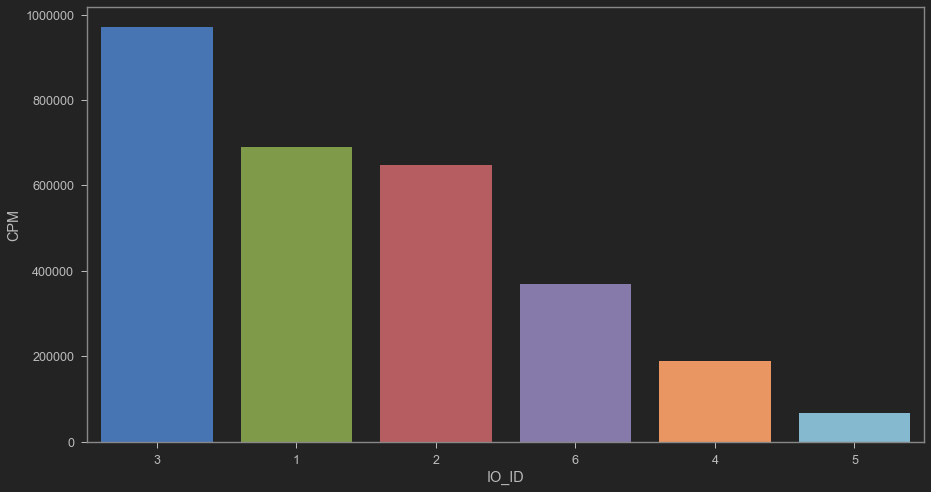

In [27]:
impression_expenditure = df.groupby("IO_ID", as_index = False)\
.sum()[['IO_ID','CPM']]\
.sort_values('CPM', ascending = False)

plt.figure(figsize = (15, 8))
sns.barplot(data = impression_expenditure, 
            x = 'IO_ID', y = 'CPM', 
            order = impression_expenditure['IO_ID'])
plt.show()

#### Who got the most impressions

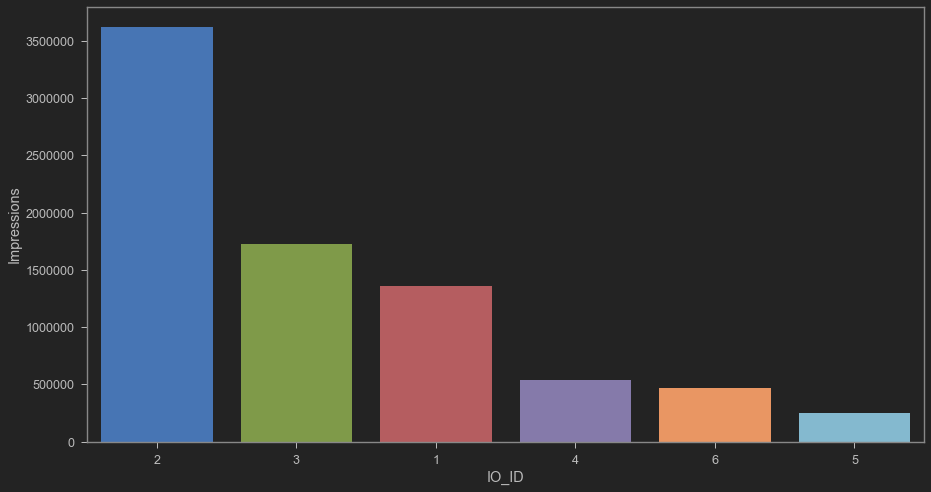

In [26]:
impression_bought = df.groupby("IO_ID", as_index = False)\
.sum()[['IO_ID', 'Impressions']]\
.sort_values('Impressions', ascending = False)

plt.figure(figsize = (15, 8))
sns.barplot(x = 'IO_ID', y ='Impressions', data = impression_bought, order = impression_bought['IO_ID'])
plt.show()

#### Which creative size is most advantageous

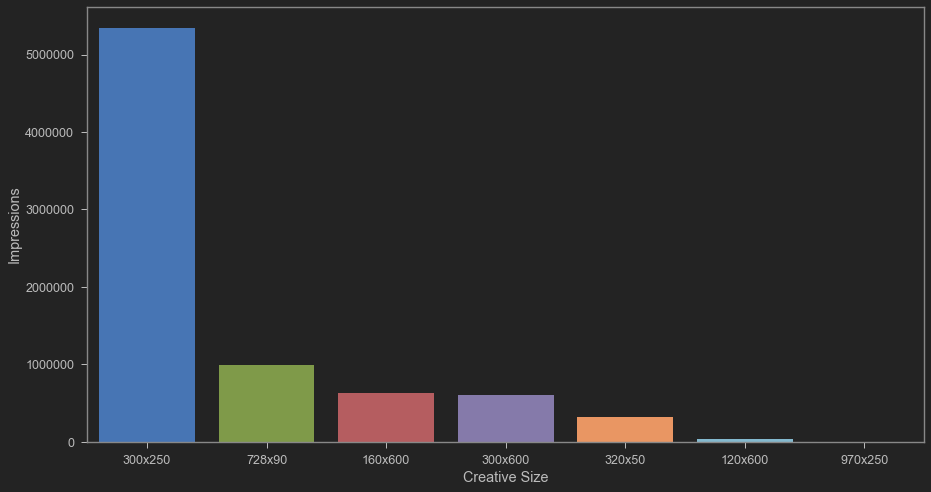

In [33]:
creative_size = df.groupby('Creative Size',as_index=False)\
.sum()[['Creative Size','Impressions']]\
.sort_values('Impressions', ascending = False)

plt.figure(figsize = (15, 8))
sns.barplot(data = creative_size, x='Creative Size', y='Impressions')
plt.show()

#### Breakdown creative size by device type.

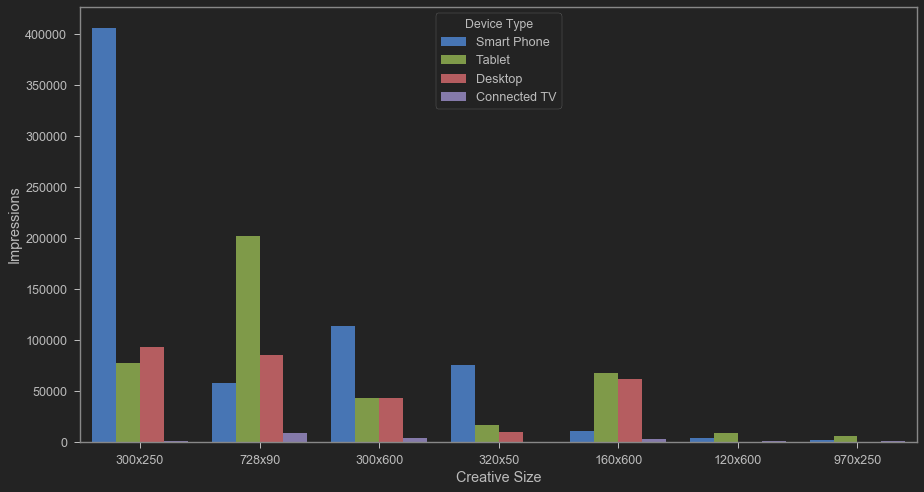

In [25]:
creative_size_popularity = df.groupby(['Creative Size', 'Device Type'],\
           as_index = False).count()[['Creative Size', 
                                      'Device Type',
                                      'Impressions']].sort_values('Impressions', ascending = False)

plt.figure(figsize = (15, 8))
sns.barplot(data = creative_size_popularity, 
            x = 'Creative Size', 
            y = 'Impressions', 
            hue = 'Device Type',
           capsize=0.2)
plt.show()

#### Which App/URL is most expesive to get an impression in and whats the creative size of it

In [70]:
df.head()

,Line Item ID,Date,App/URL ID,ISP or Carrier ID,Device Type,Exchange ID,Operating System,Browser,Creative Size,Advertiser Currency,Impressions,IO_ID,CPM
0,2,2020-08-17,1.5164E+11,1000,Desktop,1,Macintosh,Chrome,728x90,CAD,2,1,0.0105
1,2,2020-08-17,1362605575,1000,Desktop,1,Windows 10,Chrome,300x600,CAD,2,1,0.0125
2,2,2020-08-17,20303819748,207,Desktop,1,Windows 7,Chrome,160x600,CAD,2,1,0.0200
3,2,2020-08-17,20303819748,666,Desktop,1,Windows 10,Chrome,160x600,CAD,2,1,0.0350
4,2,2020-08-17,20303819748,1000,Desktop,1,Windows 10,Chrome,160x600,CAD,4,1,0.0220


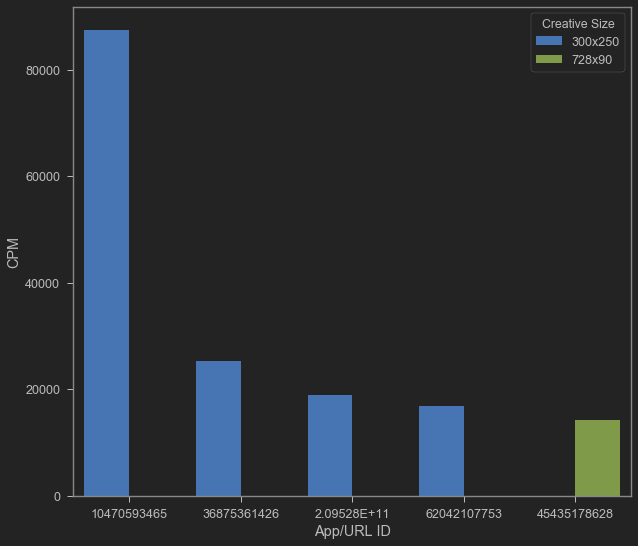

In [87]:
expensive_apps = df.groupby(['App/URL ID', 'Creative Size'], as_index = False)\
.sum()[['App/URL ID', 'Creative Size','CPM']].sort_values('CPM',ascending = False).head()

plt.figure(figsize=(10, 9))
sns.barplot(x = 'App/URL ID', y = 'CPM', 
            hue = 'Creative Size', 
            data = expensive_apps,
           order = expensive_apps['App/URL ID'])

### Multi-Variate analysis

#### Whats the daily impression per Device Type

In [111]:
# get day of week
import datetime as dt
df['day_of_week'] = df['Date'].dt.day_name()

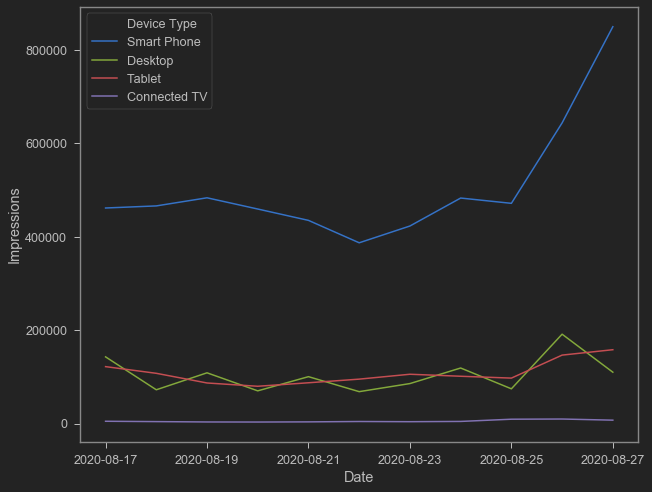

In [118]:
daily_impressions = df.groupby(['Date', 'Device Type'], as_index = False).\
sum()[['Date', 'Device Type', 'Impressions']].\
sort_values('Impressions', ascending = False)

plt.figure(figsize = (10, 8))
sns.lineplot(x = 'Date', y = 'Impressions',
            hue = 'Device Type', 
            data = daily_impressions)

#### How does CPM look like over the week

In [136]:
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)

daily_sales = df.groupby(['day_of_week'], as_index = False)\
.mean()[['day_of_week','CPM']]

daily_sales['day_of_week'] = daily_sales['day_of_week'].astype(cat_type)

In [141]:
daily_sales

,day_of_week,CPM
0,Monday,2.182943
1,Tuesday,1.979158
2,Wednesday,1.759748
3,Thursday,1.562347
4,Friday,2.857097
5,Saturday,3.066429
6,Sunday,2.696964


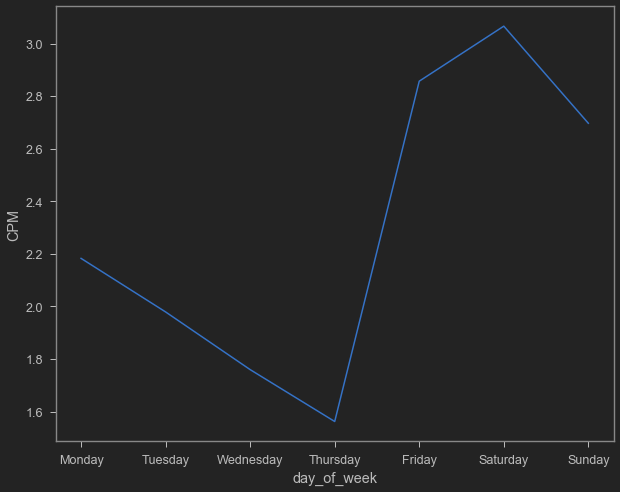

In [137]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'day_of_week', y = 'CPM', data = daily_sales, )
plt.show()

## Statistical Analysis of continuous target variable (CPM)

In [58]:
df['CPM'].describe()

count    1.397023e+06
mean     2.100198e+00
std      6.150170e+00
min      7.500000e-03
25%      5.380000e-01
50%      8.273333e-01
75%      1.903000e+00
max      1.000970e+02
Name: CPM, dtype: float64

### Probability Density function of CPM

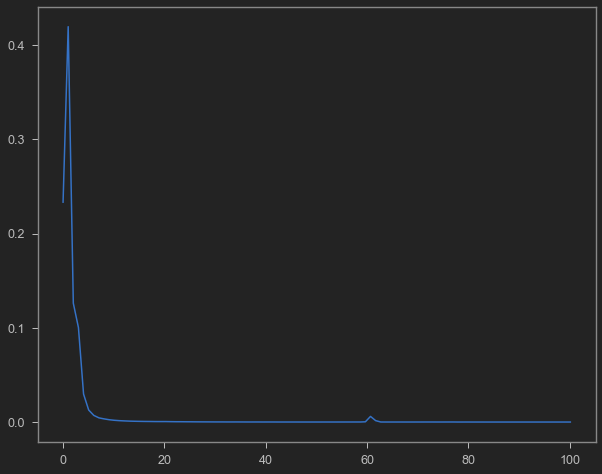

In [59]:
from scipy.stats.kde import gaussian_kde
kde = gaussian_kde(df['CPM'])
dist_space = np.linspace(min(df['CPM']), max(df['CPM']), 100)
plt.figure(figsize=(10, 8))
plt.plot(dist_space, kde(dist_space))

### CDF of the continuous variable: This looks like log-normal distribution

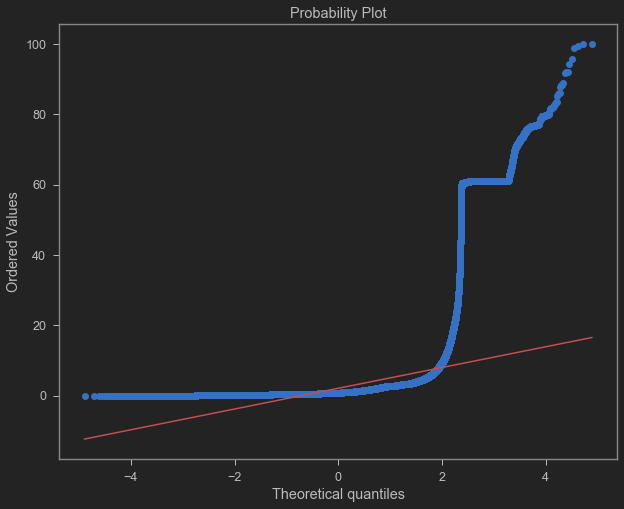

In [66]:
from scipy import stats
plt.figure(figsize=(10, 8))
stats.probplot(df['CPM'], plot = plt)
plt.show()

### Applying log transformation for a better statistical analysis

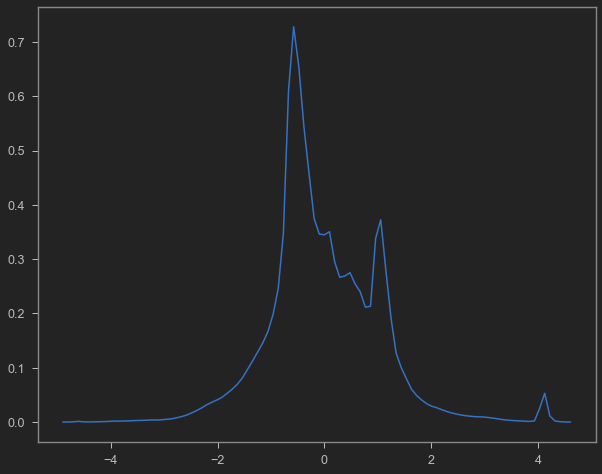

In [63]:
# PDF of log(CPM)
from scipy.stats.kde import gaussian_kde
kde = gaussian_kde(np.log(df['CPM']))
dist_space = np.linspace(min(np.log(df['CPM'])), max(np.log(df['CPM'])), 100)
plt.figure(figsize=(10, 8))
plt.plot(dist_space, kde(dist_space))

### CDF of log(CPM)

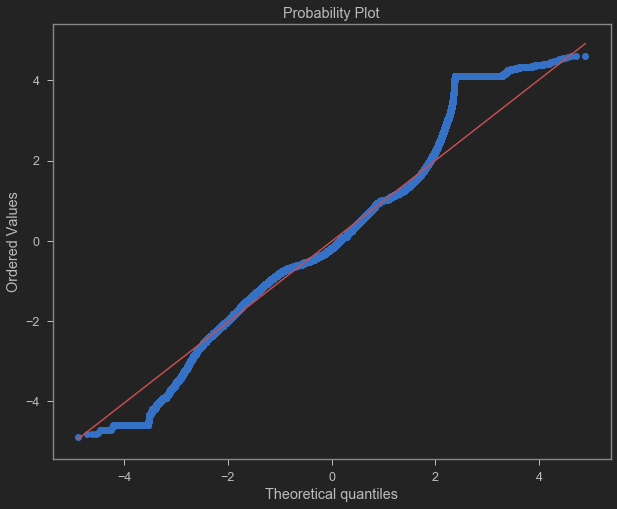

In [65]:
from scipy import stats
plt.figure(figsize = (10, 8))
stats.probplot(np.log(df['CPM']), plot = plt)
plt.show()

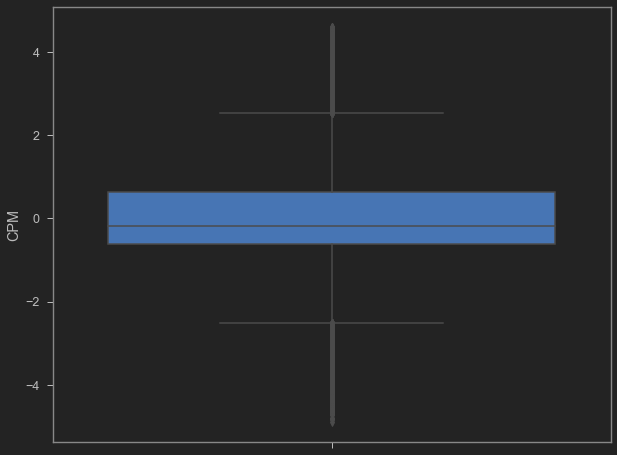

In [69]:
# Viz the distribution using boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(y = np.log(df['CPM']))
plt.show()

### New heading